In [37]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import num2date
import func as f
import pandas as pd
from scipy.interpolate import BSpline

In [47]:
era5 = xr.open_dataset('FULL-ERA5.tp.monzonmean.2000-2018.nc4')
obs = xr.open_dataset('GPS-RO__CP_LR_5x5_2007-2018.nc')
erai = xr.open_dataset('erai.tp.ctp.monmean.zm.nc')

obs_lonav = xr.open_dataset('GPS-RO_cdo_zonmean.nc')
era5_latlon = xr.open_dataset('FULL-ERA5.monthmean.2007-2018.concat_new.nc')

obs_monmean = xr.open_dataset('GPS-RO_CP_monmean_2007-2017.nc')

obs_old = xr.open_dataset('GPS-RO__LR-CP__gridded_ALL_MISSIONS_2002-2018.nc', decode_times=False)

path = '/uio/hume/student-u62/johanmeh/Documents/Master/Data_from_Susann/new_data/remap/'
era5_regrid = xr.open_dataset(path + 'gridfile_test.nc')
erai_regrid = xr.open_dataset(path + 'erai_regrid_5x5.nc')

In [14]:
## Prøver gps-ro fila med grov oppløsning fra 2002-2018
ds_obs_old = obs_old.sel(lat=slice(-20,20))
ds_obs_old['time'] = pd.date_range('2002-01-01', '2018-12-31', freq='M')
obs_lonav_old = ds_obs_old.CP_T[:,:,:].mean(axis=(1,2))

In [39]:
## Vanlige 5x5 grid gpsro
obs_wa = obs.resample(time='M').mean()
ds_obs = obs_wa.sel(lat=slice(-20,20))
obs_mean = ds_obs.mean(axis=(1,2))
obs_mean['time'] = ds_obs.time

In [16]:
## prøver cdo zonal mean, ikke brukt senere
obs_lonav_mon = obs_lonav.resample(time='M').mean()
obs_lonav_mean = obs_lonav_mon.CP_T[:,:].mean(axis=(1))


In [13]:
## Vanlig zonal mean ERA5 data
ds_era5 = era5.sel(lat=slice(-20,20)) #, time = slice('2007-01-01', '2018-12-01'))
era5_mean = ds_era5.ctpt[:,:].mean(axis=1)

In [18]:
## ERA5 latlon data for sammenligning når jeg gjør zonal mean av det
ds_latlon = era5_latlon.sel(lat=slice(-20,20), time = slice('2007-01-01', '2018-12-01'))
era5_latlon_mean = ds_latlon.ctpt[:,:,:].mean(axis=(1,2))

In [19]:
## ERA-I data, zonal mean 
ds_erai = erai.sel(lat = slice(20,-20), time = slice('2002-01-01', '2018-12-31'))
erai_mean = ds_erai.ctpt[:,:].mean(axis=1)

In [20]:
## gps-ro fil med monthly means, 2007-2017
ds_obs_monmean = obs_monmean.sel(lat=slice(-20,20))
obs_lonav_monmean = ds_obs_monmean.CP_T[:,:,:].mean(axis=(1,2))
obs_lonav_monmean['time'] = era5_latlon_mean.time[0:132]

In [21]:
# for å sjekke at tidskoordinaten er lik for gpsro og era5, bruker tiden fra era5
data_set=xr.Dataset( coords={'time': diff.time})
data_set['CP_T'] = (['time'],obs_mean)


NameError: name 'diff' is not defined

In [38]:
## teste om gridfile gir riktig svar, ERA5
era5_grid_trop = era5_regrid.sel(lat=slice(-20,20))
era5_grid_am = era5_grid_trop.mean(axis=(1,2))
era5_grid_am['time'] = era5_grid_trop.time

In [59]:
## gridfil for ERA-I
erai_grid_trop = erai_regrid.sel(lat=slice(-20,20), time=slice('2007-01-01', '2018-12-31'))
erai_grid_am = erai_grid_trop.mean(axis=(1,2))
erai_grid_am['time'] = erai_grid_trop.time


/uio/hume/student-u62/johanmeh/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


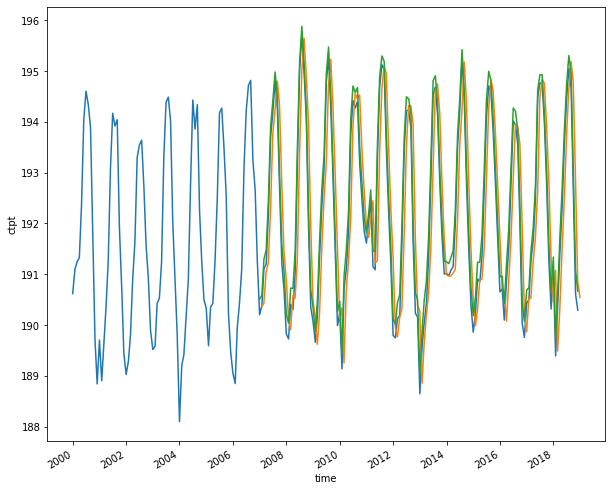

In [7]:
## plotte era5 mot obs som tidsserie, ikke diff
plt.figure(figsize=(10,8))
era5_mean.plot()
#obs_lonav_old.plot()
#data_set.CP_T.plot()
#obs_lonav_monmean.plot()
obs_mean.plot()
era5_grid_am.plot()
#plt.xlim('2007', '2009')

(-1.2, 1.2)

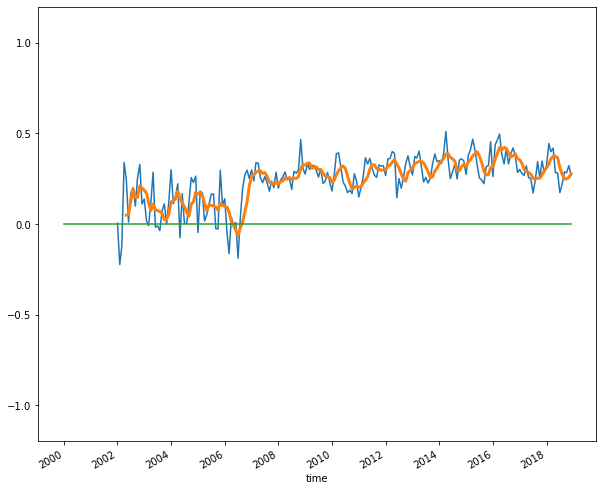

In [237]:
plt.figure(figsize=(10,8))
ddd  = era5_mean[24:] - obs_lonav_old.values
ddd.plot()
ddd.rolling(time=5).mean().plot(linewidth=3)
plt.plot(era5_mean.time, np.zeros(len(era5_mean.time)))
plt.ylim(-1.2, 1.2)

In [60]:
## xarray and naw, all the same 
## make np.array xarray object to plot

#diff = era5_mean[84:] - obs_mean.values
#diff3 = era5_xarray_aw - gpsro_xarray_aw
diff_grid = era5_grid_am.ctpt - obs_mean.CP_T.values
diff_grid_lrt = era5_grid_am.tpt - obs_mean.LR_T.values

diff_cpt_grid_erai = erai_grid_am.ctpt - obs_mean.CP_T.values
diff_lrt_grid_erai = erai_grid_am.tpt - obs_mean.LR_T.values
#diff_new = np.array(era5_mean) - np.array(data_set.CP_T)
#era5_mean
#d = era5_latlon_mean - obs_mean.values
#obs_mean.values
#data_set=xr.Dataset( coords={'time': diff.time})
#data_set['xarray'] = (['time'],diff3[0,:])

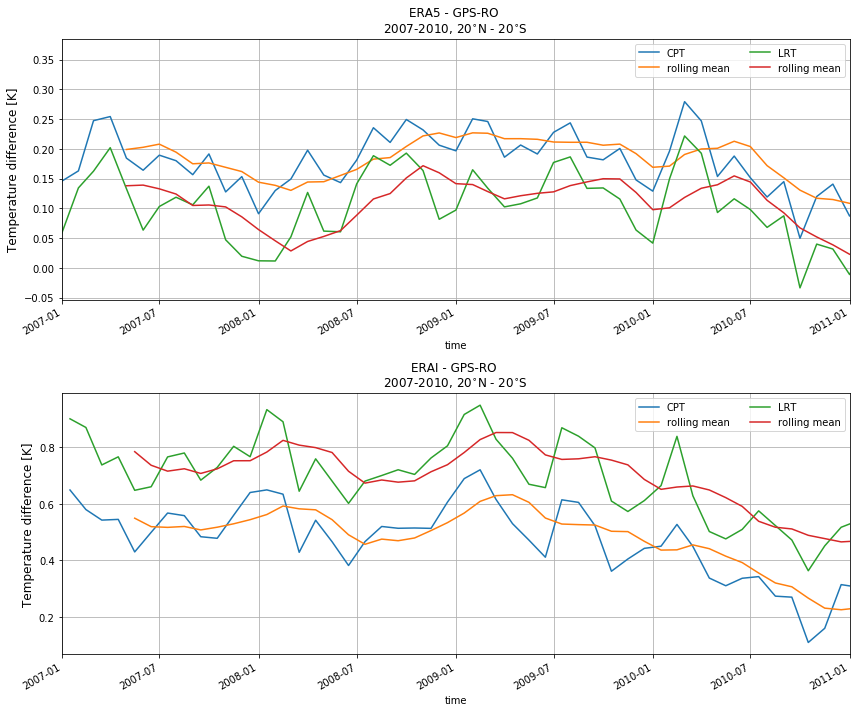

In [80]:
fig, axs = plt.subplots(2,1,figsize=(12,10))
#diff.plot(label='ERA5 1x1 - gpsro')
#diff.rolling(time=5).mean().plot()
#d.plot()
#axs[0].plot(diff.time, np.zeros(len(diff.time)))
diff_grid.plot(ax= axs[0],label='CPT')
diff_grid.rolling(time=5).mean().plot(ax=axs[0], label='rolling mean')
diff_grid_lrt.plot(ax=axs[0],label = 'LRT')
diff_grid_lrt.rolling(time=5).mean().plot(ax=axs[0], label='rolling mean')
axs[0].set_title('ERA5 - GPS-RO \n2007-2010, 20$^{\circ}$N - 20$^{\circ}$S')

diff_cpt_grid_erai.plot(ax=axs[1], label = 'CPT')
diff_cpt_grid_erai.rolling(time=5).mean().plot(ax=axs[1], label='rolling mean')
diff_lrt_grid_erai.plot(ax=axs[1], label = 'LRT')
diff_lrt_grid_erai.rolling(time=5).mean().plot(ax=axs[1], label = 'rolling mean')
axs[1].set_title('ERAI - GPS-RO \n2007-2010, 20$^{\circ}$N - 20$^{\circ}$S')

#plt.ylim(-0.5,0.5)

for ax in axs:
    ax.legend(ncol=2)
    ax.set_xlim('2007','2011')
    ax.grid()
    ax.set_ylabel('Temperature difference [K]', fontsize=12)
    
plt.tight_layout()

fig.savefig('diff_era5-gpsro_erai-gpsro_2007_2010.pdf')
#data_set.xarray.plot()
#data_set.xarray.rolling(time=10).mean().plot()

In [35]:
#diff4 = erai_mean - obs_mean.values
#diff5 = erai_xarray_aw - gpsro_xarray_aw
diff6 = era5_grid_am - obs_lonav_old.values
diff6.rolling(time=10).mean().plot()
#dsxr = xr.Dataset(coords={'time':diff4.time})
#dsxr['xarray']  = (['time'], diff5[0,:])
diff6.plot()

NameError: name 'obs_lonav_old' is not defined

(732677.0, 734138.0)

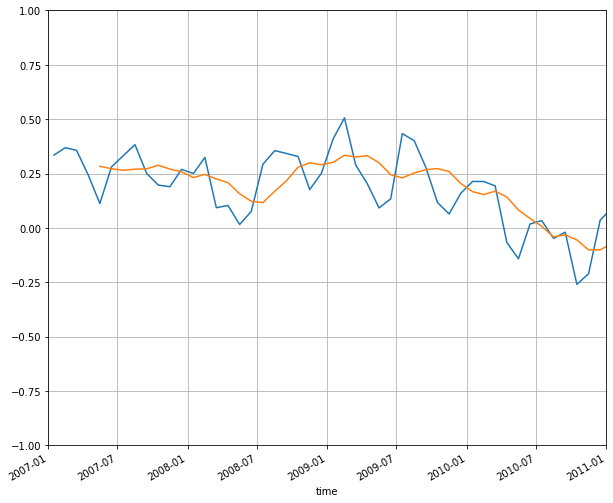

In [155]:
plt.figure(figsize=(10,8))
diff4.plot()
diff4.rolling(time=5).mean().plot()
plt.grid()
plt.ylim(-1,1)
plt.xlim('2007', '2011')

In [53]:
path = '/uio/hume/student-u62/johanmeh/Documents/Master/Data_from_Susann/new_data/aw/'
nco_era5 = xr.open_dataset(path+'ERA5_lat_aw.nc')
nco_gpsro = xr.open_dataset(path + 'GPS-RO_lat_averaged.nc')
cdo_era5 = xr.open_dataset(path + 'ERA5_lat_cdo_aw.nc')
cdo_gpsro = xr.open_dataset(path + 'GPS-RO_cdo_aw.nc')
nco_erai = xr.open_dataset(path + 'ERAI_lat_aw.nc')

In [54]:
nco_era5_sel = nco_era5.ctpt.sel(time=slice('2007-01-01', '2018-12-01'))
nco_gpsro_sel = nco_gpsro.resample(time='M').mean()

cdo_era5_sel = cdo_era5.ctpt.sel(time=slice('2007-01-01', '2018-12-01'))
cdo_gpsro_sel = cdo_gpsro.CP_T.resample(time='M').mean()

nco_erai_sel = nco_erai.ctpt.sel(time=slice('2007-01-01', '2018-12-31'))


In [ ]:
nco_era5_sel.plot()

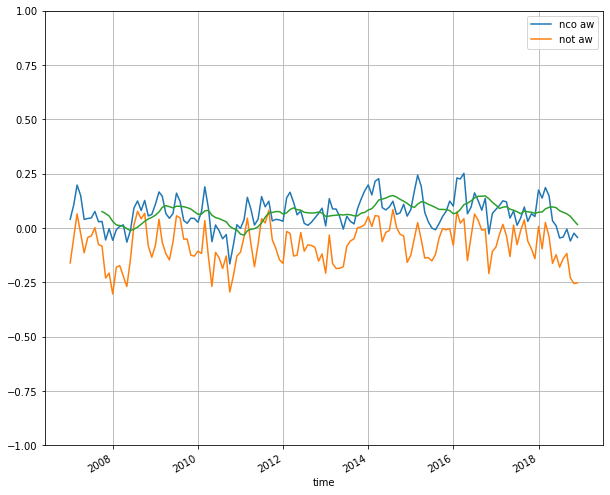

In [59]:
plt.figure(figsize=(10,8))

diff2 = nco_era5_sel - nco_gpsro_sel.CP_T.values
diff2.plot(label='nco aw')
diff.plot(label='not aw')
diff2.rolling(time=10).mean().plot()
plt.grid()
plt.ylim(-1,1)
#plt.xlim('2007', '2011')
plt.legend()

(-1, 1)

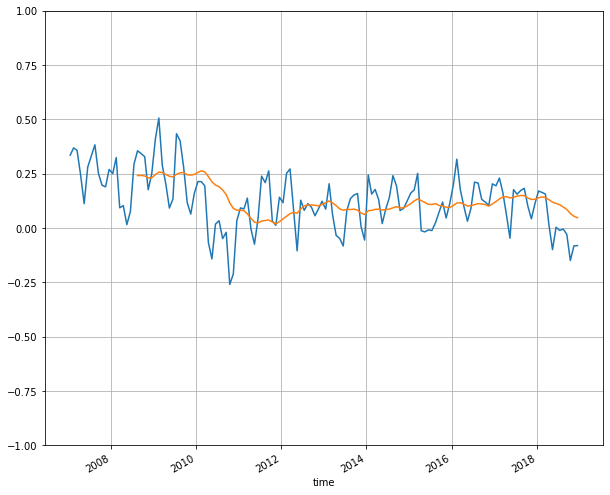

In [147]:
plt.figure(figsize=(10,8))
diff8 = nco_erai_sel - nco_gpsro_sel.CP_T.values
diff8.plot()
diff8.rolling(time=20).mean().plot()

plt.grid()
plt.ylim(-1,1)
#plt.plot(yr, np.array(cdo_era5_sel[:,0,0]) - np.array(cdo_gpsro_sel[:,0,0]))